In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("C:/Git_repos/ML/cluster.csv")

In [49]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51712 entries, 0 to 51711
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         51712 non-null  object 
 1   Client Name  51712 non-null  object 
 2   DUNS         51712 non-null  int64  
 3   Brand        51712 non-null  object 
 4   Revenue      51712 non-null  float64
 5   GP           51712 non-null  float64
 6   Industry     51512 non-null  object 
 7   Employees    51712 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.2+ MB
None
               DUNS       Revenue            GP     Employees
count  5.171200e+04  5.171200e+04  5.171200e+04  5.171200e+04
mean   4.513204e+07  8.792626e+04  2.192283e+04  5.827066e+04
std    4.504820e+06  3.963421e+05  1.181649e+05  2.965282e+05
min    1.006337e+06 -1.048459e+07 -4.277927e+06  1.000000e+00
25%    4.567366e+07  3.280122e+03  6.365550e+02  1.800000e+02
50%    4.567366e+07  1.197523e+04

In [50]:
# Features for clustering
features = ['Revenue', 'GP', 'Employees']
X = df[features]

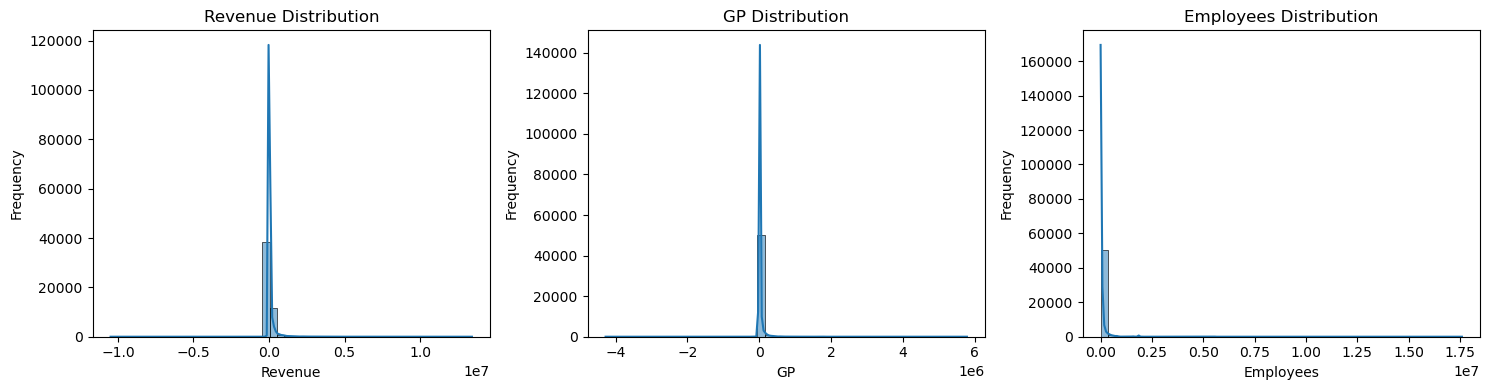

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Revenue', 'GP', 'Employees']

plt.figure(figsize=(15, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig("revenue_gp_employees_hist.png", dpi=300)
plt.tight_layout()
plt.show()

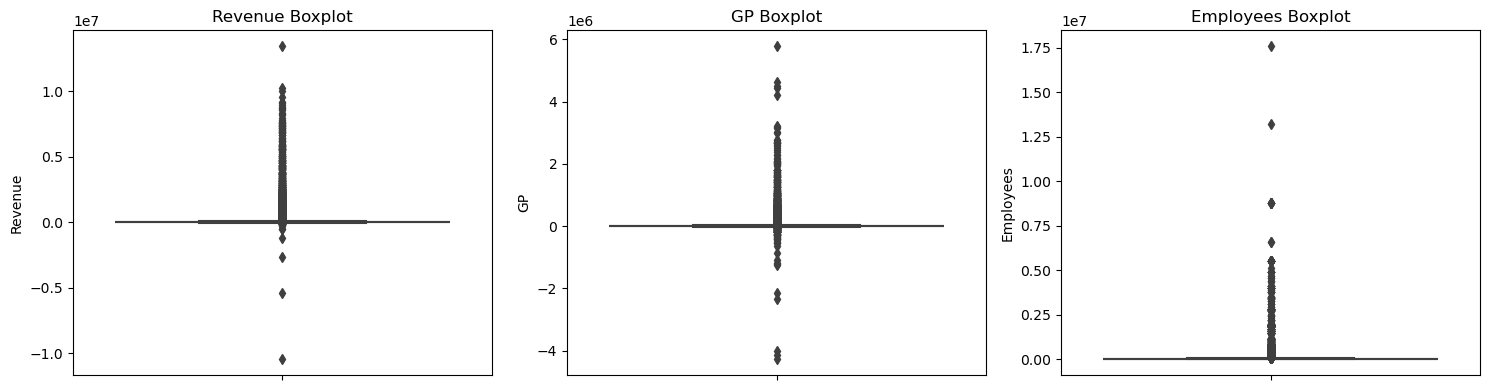

In [52]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Boxplot')
    plt.savefig("revenue_gp_employees_boxplot.png", dpi=300)
plt.tight_layout()
plt.show()

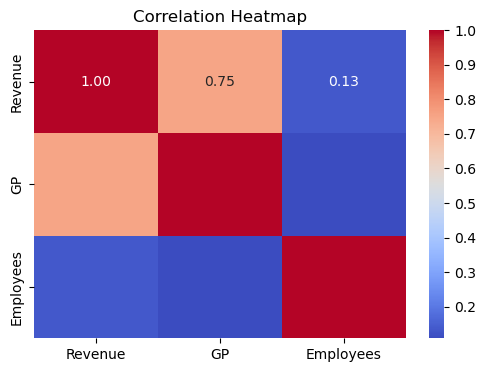

In [53]:
plt.figure(figsize=(6, 4))
df_corr = df[['Revenue', 'GP', 'Employees']].dropna()
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("revenue_gp_employees_correlation.png", dpi=100)
plt.show()

In [54]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
X_scaled

array([[-0.20741348, -0.17171363, -0.19533125],
       [ 0.40135657,  0.28160535,  1.12378034],
       [-0.21978009, -0.18447719,  1.12378034],
       ...,
       [ 2.85397617,  3.52184527, -0.19650822],
       [ 1.38990164,  2.29473571, -0.112539  ],
       [ 0.81654422,  0.97425026, -0.19648798]])

In [56]:
# Use the elbow method to find optimal number of clusters
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

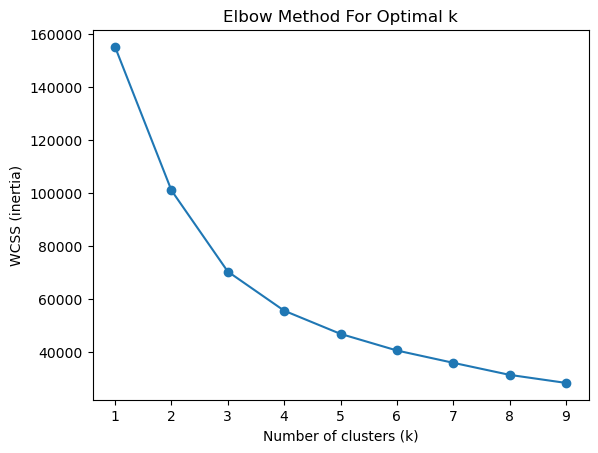

In [57]:
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (inertia)')
plt.title('Elbow Method For Optimal k')
plt.savefig("Optimal_k.png" , dpi=200)
plt.show()

In [58]:

kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

In [59]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

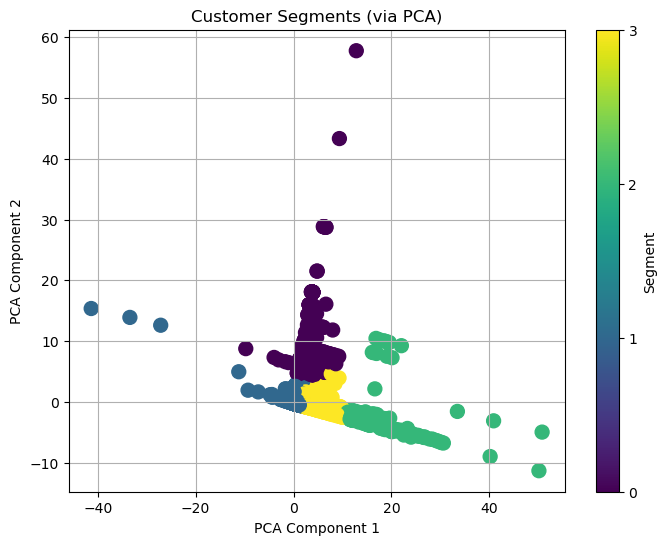

In [60]:
colors = sns.color_palette("viridis", 4)
cluster_labels = [0, 1, 2, 3]

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Segment'], cmap='viridis', s=100)
plt.title('Customer Segments (via PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
cbar = plt.colorbar(scatter, ticks=[0, 1, 2, 3])
cbar.set_label('Segment')
plt.savefig("cluster.png" , dpi=200)
plt.show()

In [61]:
for seg in sorted(df['Segment'].unique()):
    df[df['Segment'] == seg][['Client Name', 'Revenue', 'GP', 'Employees']].to_csv(
        f"clients_cluster_{seg}.csv", index=False
    )

In [62]:
df.groupby('Segment')[['Revenue', 'GP', 'Employees']].mean().round(2)

,Revenue,GP,Employees
Segment,,,
0,388824.80,74223.70,2645970.04
1,43154.03,11050.15,34459.52
2,5281264.90,1495563.39,446942.25
3,1328219.90,299262.49,167261.13
